# KNN（K最近邻分类）算法

如果有一个数据集中，有N类数据。输入没有标分类的数据集后，我们可以将预测集中的数据，和训练集的数据相比较，提取和预测数据最相似（距离最近）的K个数据，选择这K个数据中出现次数最多的标签，作为新数据的分类。



KNN算法的思想非常简洁直观：

1、计算测试数据与各个训练数据之间的距离； 
    
2、按照距离的递增关系进行排序；  
   
3、选取距离最小的K个点；  
   
4、确定前K个点所在类别的出现频率； 
   
5、返回前K个点中出现频率最高的类别作为测试数据的预测分类。

### KNN算法的优点：
1、简单，易于实现； 
 
2、因为找的是最近邻的数据点，因此当某些点数量稀少时，划分越准确，适合对稀有点分类； 
 
3、使用多分类问题。

## 算法实现

我们利用一个案例，按照KNN算法的思想，逐步实现算法。

### KNN案例：优化约会网站的配对效果


<b>项目概述</b>

海伦使用约会网站寻找约会对象。经过一段时间之后，她发现曾交往过三种类型的人:

- 1：不喜欢的人
- 2：魅力一般的人
- 3：极具魅力的人


她希望：

- 不喜欢的人则直接排除掉
- 工作日与魅力一般的人约会
- 周末与极具魅力的人约会


现在她收集到了一些约会网站未曾记录的数据信息，这更有助于匹配对象的归类。

<b>开发流程</b>

海伦把这些约会对象的数据存放在文本文件 datingTestSet2.txt 中，总共有 1000 行。海伦约会的对象主要包含以下 3 种特征：

- `Col1`：每年获得的飞行常客里程数 
- `Col2`：玩视频游戏所耗时间百分比 
- `Col3`：每周消费的冰淇淋公升数 

文本文件数据格式如下：
```python
40920	8.326976	0.953952	3
14488	7.153469	1.673904	2
26052	1.441871	0.805124	1
75136	13.147394	0.428964	1
38344	1.669788	0.134296	1


#### 读取数据

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('datingTestSet2.txt',sep = '\t',header = None)
X = np.array(data.iloc[:,:-1]) 
y = np.array(data.iloc[:,-1])

#### 切分数据

我们可以直接调用sklearn的函数将数据集切分为训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

计算测试集数据和训练集间的距离，进行分类。 
 
我们先用最简单的思想分类：将想要预测的样本，和训练集中每个样本的特征直接相减的绝对值之和作为距离，将距离最近的训练样本的标签标记为预测样本的标签。

In [8]:
class KNN:
    def __init__(self):
        pass
    def train(self,X_train,y_train):
        #读取训练集
        self.X_train = np.array(X_train) 
        self.y_train = np.array(y_train)
    def predict(self,X_test):
        (m,d) = np.shape(X_test) #测试集的数量和特征数
        y_pred = np.zeros((m)) #将预测的标签初始化为0
        for i in range(m):    
            distance = np.sum(np.abs(self.Xtrain - X_test[i,:]),axis = 1) #求距离的绝对之和
            min_index = np.argmin(distance) #找到最近点的索引
            y_pred[i] = self.y_train[min_index] #将最近点的分类给新数据标记
        return y_pred

我们可以将这个算法称为“最近邻算法“，直接取找最近的一个数据进行分类标记，我们将这个算法扩展到K近邻算法。

可以扩展的方向：
* 选择不同的距离公式
* 选择不同的K值

#### 选择不同的距离公式：
上一个算法中用的距离公式为曼哈顿距离，将参数特征相减的绝对值求和，即L1距离。我们还可以用L2距离，

曼哈顿距离：$$d_1(I_1,I_2) = \sum_P|I_1^p - I_2^p|$$

欧式距离：$$d_2(I_1,I_2) = \sum_P\sqrt{(I_1^p - I_2^p)^2}$$

打个比方来说，当你搜索地图上的两个点，欧式距离就是将两个点用直线相连的空间距离；曼哈顿距离衡量的是你从A点开车到B点的距离，因为你不能穿过大楼和墙壁，所以衡量的是横向路线和纵向路线的的加总距离。  
  
KNN算法中，欧式距离用的更多，因为我们一般衡量变量特征的在多维空间中的距离，这时候不需要“开车绕墙”。 
 
如有兴趣，可自行学习其他距离公式，添加到我们后面的算法中。

#### 选择不同的K值
我们不再是选取排序后距离最近的一个训练数据打标签，而是选择距离最近的前K个训练数据，找到大多数近邻归属的类别，将预测值归为此类。

排序和计数我们可以直接调用argsort函数和Counter函数 
 
按照以上思想，我们重新改写KNN算法：

In [9]:
from collections import  Counter
class KNN:
    def __init__(self,k=1,metric ='euclidean'): #默认距离算法为欧式距离，默认最近邻
        self.metric = metric
        self.k = k
    def train(self,X_train,y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    def predict(self,x_test):
        (m,d) = np.shape(x)#测试集的数量和特征数
        y_pred = np.zeros((m))#将预测的标签初始化为0
        for i in range(m):  
            if self.metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - X_test[i,:]),axis = 1) #曼哈顿距离
            if self.metric == 'euclidean':
                distances = np.sqrt(np.sum(np.square(self.X_train - X_test[i,:]),axis = 1)) #欧式距离
            
            #距离排序
            top_K = [self.y_train[i] for i in sort[:self.k]] #找到K个近邻
            k_counts = Counter(top_K) #对K个近邻的分类计出现频率
            label = k_counts.most_common(1)[0][0] #将占大多数的那个分类标记为新数据的标签
            ypred[i] = label
        return ypred

*可能你会问，如果两个分类刚好数量相等怎么办？可以有多种方法进行处理，如随机分类，如比较两类的距离总长度，我们这里不做更多处理，按Counter函数默认给出的分类。*

#### 选择K值

那么到底如何选择K值呢？我们可以选择在测试集中表现最好的K值。 
 
本任务中我们直接调用sklearn中的kFold函数，将数据集进行k折验证，取每次验证的评分平均值作为此K值的误差评分。（这两个k表示的意思不一样，请留意）

如何定义测试结果的评分呢？可以直观地将分类正确的比例作为衡量指标。定义准确度的函数为：

In [10]:
def score(ypred,ytest):
    return sum(ypred == ytest)/len(ytest)

将我们自己撰写的分类器中添加评分函数，这就是一个相对完整的分类器了，我们可以将他和sklearn的结果做比较

In [11]:
from collections import  Counter
class KNN:
    def __init__(self,k,metric ='euclidean'):
        pass
        self.metric = metric
        self.k = k
    def train(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def predict(self,x_test):
        x = np.array(x_test)
        (m,d) = np.shape(x)
        ypred = np.zeros((m))
        for i in range(m):  
            if self.metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - x[i,:]),axis = 1)
            if self.metric == 'euclidean':
                distances = np.sqrt(np.sum(np.square(self.X_train - x[i,:]),axis = 1))
            
            nearest = np.argsort(distances)
            #print(len(nearest))
            top_K = [self.y_train[i] for i in nearest[:self.k]]
            votes = Counter(top_K)
            label = votes.most_common(1)[0][0]
            #min_index = np.argmin(distance)
            #ypred[i] = self.ytrain[min_index]
            ypred[i] = label
        return ypred
    def score(self,ypred,ytest):
        return sum(ypred == ytest)/len(ytest)
    

#### 和sklearn的KNeighborsClassifier算法做比较

In [12]:
#数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_ = ss.fit(X)
X_std =ss.transform(X)

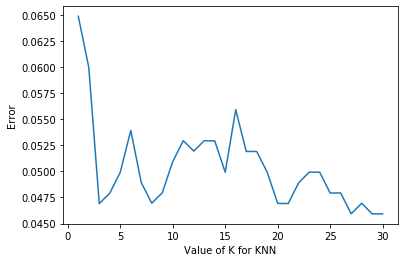

In [13]:
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 31)
k_error = []
#循环，取k=1到k=31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例，这里是按照5:1划分训练集和测试集
    scores = cross_val_score(knn, X_std, y, cv=5, scoring='accuracy')
    k_error.append(1 - scores.mean())

#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

用我们自己撰写的K近邻算法测试数据，用同样的作图法输出每个K值的误差结果。

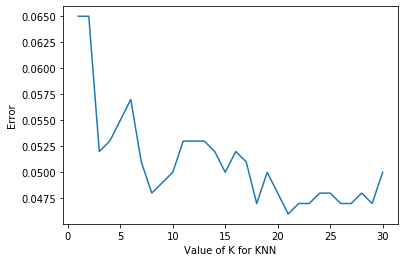

In [17]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False) #将数据集分为互斥的5等份，用作测试
k_errors = [] #建立初始的误差列表
for k in k_range:
    knn = KNN(k=k)
    scores = []
    for train , test in kf.split(X_std,y):
        knn.train(X_std[train],y[train])
        ypred = knn.predict(X_std[test])
        score = knn.score(ypred,y[test])
        scores.append(1-score)
    k_errors.append(np.mean(scores))

plt.plot(k_range, k_errors)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()  

观察到，算法在$k=21$的时候表现良好，取K值为21，来预测一个新数据

In [15]:
knn = KNN(k=21)
knn.train(X_std,y)

In [16]:
# 定义类别对应的标签
resultList = ['不喜欢的人', '魅力一般的人', '极具魅力的人']
#输入数据
ffMiles = float(input("每年获得的飞行常客里程数?"))
percentTats = float(input("玩视频游戏所耗时间百分比?"))
iceCream = float(input("每周消费的冰淇淋公升数?"))
inArr = np.array([[ffMiles, percentTats, iceCream]])
#用之前的fit的标准化数据来转换数据
x_new = ss.transform(inArr)
#预测数据
ypred = knn.predict(x_new)
print("这个人属于: ", resultList[int(ypred) - 1])

每年获得的飞行常客里程数?97866986
玩视频游戏所耗时间百分比?89
每周消费的冰淇淋公升数?97
这个人属于:  不喜欢的人


## 参考资料

https://baike.baidu.com/item/%E9%82%BB%E8%BF%91%E7%AE%97%E6%B3%95/1151153?fromtitle=knn&fromid=3479559&fr=aladdin

https://www.cnblogs.com/midiyu/p/10786765.html

https://www.cnblogs.com/listenfwind/p/10685192.html

https://blog.csdn.net/m0_38056893/article/details/102990001

http://people.csail.mit.edu/dsontag/courses/ml12/slides/lecture10.pdf

http://cs231n.github.io/classification/

https://www.csd.uwo.ca/courses/CS4442b/L3-ML-knn.pdf

http://cs231n.stanford.edu/slides/2019/cs231n_2019_lecture02.pdf

https://blog.csdn.net/FrankieHello/article/details/79659111

https://www.cnblogs.com/jyroy/p/9427977.html